# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [4]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

In [18]:
df_ori = pd.read_csv('/Users/xiafei/code/itu-ml-challenge/csv/dataset.csv')
try:
    df_ori = df_ori.loc[:,(df_ori !=0).any(axis=0)]
    df_ori = df_ori.drop(columns=['Unnamed: 0'])
except:
    print('drop error')

In [19]:
print(df_ori.shape)
df_ori.head()

(9670, 662)


,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,p_/computes0/cpu_info/topology/sockets,p_/computes0/running_vms,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,16,20,48,41472,257790,12,2,2,1,5,...,13.236069,1401532.0,0.100425,174853276.0,11.431817,1263588.0,0.099783,1593395580,ixnetwork-traffic-start,0
1,16,20,48,41472,257790,12,2,2,1,5,...,11.438221,1401538.0,0.099506,174854074.0,13.313681,1263595.0,0.116705,1593395640,ixnetwork-traffic-start,0
2,16,20,48,41472,257790,12,2,2,1,5,...,11.438221,1401545.0,0.099506,174854758.0,13.313681,1263601.0,0.100463,1593395700,ixnetwork-traffic-start,0
3,16,20,48,41472,257790,12,2,2,1,5,...,11.429972,1401551.0,0.099826,174855556.0,13.277844,1263608.0,0.116223,1593395760,ixnetwork-traffic-start,0
4,16,20,48,41472,257790,12,2,2,1,5,...,11.429972,1401558.0,0.116494,174856338.0,13.277844,1263615.0,0.116614,1593395820,ixnetwork-traffic-start,0


# Select type n as the original data

In [20]:
curr_type = 5

In [21]:
df_ori_typeN = df_ori[df_ori['v_type_code'] == curr_type]

In [22]:
df_ori_typeN.head()

,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,p_/computes0/cpu_info/topology/sockets,p_/computes0/running_vms,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
282,16,20,48,41472,257790,12,2,2,1,5,...,13.322413,1418712.0,0.117148,211089956.0,11.396969,1295740.0,0.116821,1593412500,tap-loss-start,5
283,16,20,48,41472,257790,12,2,2,1,5,...,14.234634,1418719.0,0.116205,211090754.0,14.297662,1295747.0,0.116983,1593412560,tap-loss-start,5
284,16,20,48,41472,257790,12,2,2,1,5,...,12.589926,1418726.0,0.116794,211091438.0,13.240228,1295753.0,0.099260,1593412620,tap-loss-start,5
285,16,20,48,41472,257790,12,2,2,1,5,...,13.288430,1418732.0,0.116794,211092122.0,11.420076,1295759.0,0.099960,1593412680,tap-loss-start,5
286,16,20,48,41472,257790,12,2,2,1,5,...,11.379676,1418738.0,0.100191,211092920.0,13.354185,1295766.0,0.116854,1593412740,tap-loss-start,5


In [23]:
df_ori_typeN.shape

(1707, 662)

<AxesSubplot:>

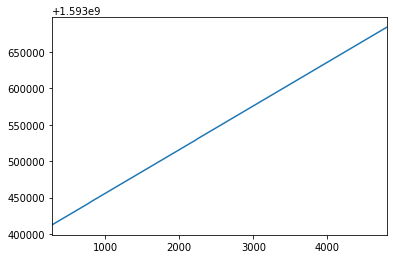

In [24]:
df_ori_typeN['v_/time'][:1000].plot.line()

# Batch generated data

In [25]:
## Dataset parameters
seq_len = 100

## Newtork parameters
parameters = dict()

parameters['module'] = 'lstm' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 2000
parameters['batch_size'] = 128

metric_iteration = 10
dataset_list = ['660.csv']

In [26]:
discriminative_score_list = []
predictive_score_list = []
df_generated_list = []
cal_score = False # it will take a long time

for dataset_name in dataset_list:
    data_name = dataset_name[:-4]
    
    # 1. Load data
    ori_data, scaler= real_data_loading(data_name, seq_len, mix=False, data_dir='./data/test/')
    print(data_name + ' dataset is ready.')
    
    # 2. Run TimeGAN
    generated_data = timegan(ori_data, parameters)   
    print('Finish Synthetic Data Generation')
    
    if cal_score:
        # 3. Discriminative score
        discriminative_score = list()
        for _ in range(metric_iteration):
            temp_disc = discriminative_score_metrics(ori_data, generated_data)
            discriminative_score.append(temp_disc)

        discriminative_score_list.append(np.round(np.mean(discriminative_score), 4))
        print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

        # 4. Predictive score
        predictive_score = list()
        for tt in range(metric_iteration):
            temp_pred = predictive_score_metrics(ori_data, generated_data)
            predictive_score.append(temp_pred)

        predictive_score_list.append(np.round(np.mean(predictive_score), 4))
        print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))
    
    # 5. Recover data
    g_data = np.reshape(generated_data, (generated_data.shape[0] * generated_data.shape[1], generated_data.shape[2]))
    g_data = scaler.inverse_transform(g_data)
    df_generated = pd.DataFrame(g_data)
    
    df_ori = pd.read_csv('./data/test/'+data_name+'.csv')
    df_generated.columns = df_ori.columns
    df_generated_list.append(df_generated)

df_final = pd.concat(df_generated_list, axis=1)
print(df_final.shape)

660 dataset is ready.
Start Embedding Network Training
step: 0/2000, e_loss: 0.3768
step: 1000/2000, e_loss: 0.076
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/2000, s_loss: 0.3645
step: 1000/2000, s_loss: 0.0219
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/2000, d_loss: 2.0936, g_loss_u: 0.6808, g_loss_s: 0.0305, g_loss_v: 0.4286, e_loss_t0: 0.0881
step: 1000/2000, d_loss: 1.9045, g_loss_u: 1.1127, g_loss_s: 0.0246, g_loss_v: 0.0436, e_loss_t0: 0.053
Finish Joint Training
Finish Synthetic Data Generation
(160700, 30)


In [33]:
print(discriminative_score_list)
print(predictive_score_list)

[]
[]


In [34]:
# type 3 : interface-down
# type 5 : tap-loss-start
# type 9 : ixnetwork-bgp-injection-start
# type 11: ixnetwork-bgp-hijacking-start

df_final['v_type'] = 'tap-loss-start'
df_final['v_type_code'] = 57

In [35]:
df_final.head()

,v_/ports#link-tr-ssm-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-ssm-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-ssm-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-ssm-a-1-y/metrics/network-outgoing-packets-rate,v_/ports#link-tr-ssm-b-1-y/metrics/network-incoming-bytes,v_/ports#link-tr-ssm-b-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-ssm-b-1-y/metrics/network-incoming-packets,v_/ports#link-tr-ssm-b-1-y/metrics/network-incoming-packets-drop,v_/ports#link-tr-ssm-b-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-ssm-b-1-y/metrics/network-outgoing-bytes,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,1.644755e+13,5.451622e+06,1.378774e+10,4601.889816,3.996559e+13,5.496027e+06,3.358381e+10,3.191792e+07,4594.194802,1.631072e+13,...,13.803597,1.501012e+06,0.096136,2.410800e+08,12.759651,1.368596e+06,0.107617,1.593876e+09,tap-loss-start,57
1,1.631547e+13,5.930799e+06,1.372195e+10,4949.286499,3.988679e+13,5.500853e+06,3.346078e+10,3.171815e+07,4588.755732,1.617967e+13,...,25.923027,1.498680e+06,0.183443,2.407877e+08,32.508712,1.366313e+06,0.201622,1.593858e+09,tap-loss-start,57
2,1.603484e+13,5.570296e+06,1.347861e+10,4640.634177,3.962184e+13,5.606166e+06,3.324695e+10,3.053090e+07,4693.874144,1.589704e+13,...,14.045990,1.489913e+06,0.119109,2.369385e+08,12.785570,1.357506e+06,0.124077,1.593805e+09,tap-loss-start,57
3,1.595789e+13,5.297740e+06,1.340893e+10,4437.925110,3.955131e+13,5.625903e+06,3.318818e+10,2.987841e+07,4713.942809,1.584308e+13,...,10.884950,1.488231e+06,0.096673,2.349097e+08,11.689605,1.354905e+06,0.114259,1.593791e+09,tap-loss-start,57
4,1.597090e+13,5.202045e+06,1.341883e+10,4378.204093,3.956497e+13,5.628769e+06,3.319564e+10,2.981118e+07,4716.980938,1.586619e+13,...,10.193357,1.489123e+06,0.090088,2.346885e+08,11.580208,1.355191e+06,0.113395,1.593794e+09,tap-loss-start,57


In [36]:
df_final.shape

(160700, 32)

In [37]:
# df_final.to_csv('./data/generated_all_data.csv', index=False)

<AxesSubplot:>

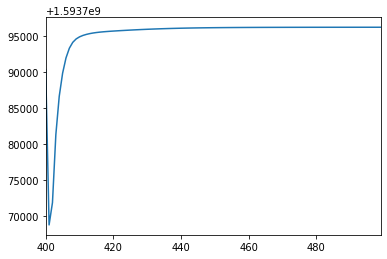

In [46]:
df_final['v_/time'][400:500].plot.line()

In [235]:
## Dataset parameters
seq_len = 24

## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 4000
parameters['batch_size'] = 128

metric_iteration = 10
data_name = 'stock_test'

In [236]:
# d = {'col0': [1,3,9,27,81,243,729,2187,6561,19683, 59049, 177147],'col1': [1,2,4,8,16,32,64,128,256,512,1024,2048], 'col2': [100,99,98,97,96,95,94,93,92,91,90,89], 'col3': [1593412500,1593412560,1593412620,1593412680,1593412740,1593413160,1593413220,1593413280,1593413340,1593413400,1593413760,1593413820]}
# df_test = pd.DataFrame(data=d)

In [237]:
# df_test.to_csv('./data/test/seq.csv', index=False)

# Load data

In [238]:
df_test = pd.read_csv('./data/test/'+data_name+'.csv')

In [240]:
print(df_test.shape)
df_test.head(10)

(3685, 5)


,Open,High,Low,test,v_/time
0,49.676899,51.693783,47.669952,1,1593395580
1,50.178635,54.187561,49.925285,2,1593395640
2,55.017166,56.373344,54.172661,3,1593395700
3,55.260582,55.439419,51.450363,4,1593395760
4,52.140873,53.651051,51.604362,5,1593395820
5,52.135906,53.626213,51.991844,1,1593395880
6,53.700729,53.959049,52.503513,2,1593395940
7,52.299839,52.404160,50.675404,3,1593396000
8,50.819469,51.519913,50.749920,4,1593396060
9,51.018177,51.152302,49.512966,5,1593396120


In [241]:
ori_data, scaler= real_data_loading(data_name, seq_len, mix=False, data_dir='./data/test/')
print(data_name,'dataset is ready.')

stock_test dataset is ready.


In [242]:
# ori_data = ori_data[::5]

In [243]:
print(len(ori_data), len(ori_data[0]), len(ori_data[0][0]))

3661 24 5


In [244]:
discriminative_score_list = []
predictive_score_list = []
df_generated_list = []
cal_score = False # it will take a long time

# 2. Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')

if cal_score:
    # 3. Discriminative score
    discriminative_score = list()
    for _ in range(metric_iteration):
        temp_disc = discriminative_score_metrics(ori_data, generated_data)
        discriminative_score.append(temp_disc)

    discriminative_score_list.append(np.round(np.mean(discriminative_score), 4))
    print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

    # 4. Predictive score
    predictive_score = list()
    for tt in range(metric_iteration):
        temp_pred = predictive_score_metrics(ori_data, generated_data)
        predictive_score.append(temp_pred)

    predictive_score_list.append(np.round(np.mean(predictive_score), 4))
    print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

# 5. Recover data
g_data = np.reshape(generated_data, (generated_data.shape[0] * generated_data.shape[1], generated_data.shape[2]))
g_data = scaler.inverse_transform(g_data)
df_generated = pd.DataFrame(g_data)

df_ori = pd.read_csv('./data/test/'+data_name+'.csv')
df_generated.columns = df_ori.columns
df_generated_list.append(df_generated)

df_final = pd.concat(df_generated_list, axis=1)
print(df_final.shape)

Start Embedding Network Training
step: 0/4000, e_loss: 0.3237
step: 1000/4000, e_loss: 0.0386
step: 2000/4000, e_loss: 0.0146
step: 3000/4000, e_loss: 0.0129
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/4000, s_loss: 0.2588
step: 1000/4000, s_loss: 0.0356
step: 2000/4000, s_loss: 0.0212
step: 3000/4000, s_loss: 0.0126
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/4000, d_loss: 2.1973, g_loss_u: 0.6402, g_loss_s: 0.0224, g_loss_v: 0.6462, e_loss_t0: 0.1029
step: 1000/4000, d_loss: 0.8979, g_loss_u: 2.9249, g_loss_s: 0.0163, g_loss_v: 0.0591, e_loss_t0: 0.0089
step: 2000/4000, d_loss: 1.0989, g_loss_u: 2.1915, g_loss_s: 0.0228, g_loss_v: 0.0587, e_loss_t0: 0.0068
step: 3000/4000, d_loss: 1.0772, g_loss_u: 2.1554, g_loss_s: 0.0244, g_loss_v: 0.0488, e_loss_t0: 0.0066
Finish Joint Training
Finish Synthetic Data Generation
(87864, 5)


In what concerns the losses, the TimeGAN is composed by three:
- The reconstruction loss, which refers to the auto-encoder (embedder & recovery), that in a nutshell compares how well was the reconstruction of the encoded data when compared to the original one.
- The supervised loss that, in a nutshell, is responsible to capture how well the generator approximates the next time step in the latent space.
- The unsupervised loss, this one it’s already familiar to us, a it reflects the relation between the generator and discriminator networks (min-max game)

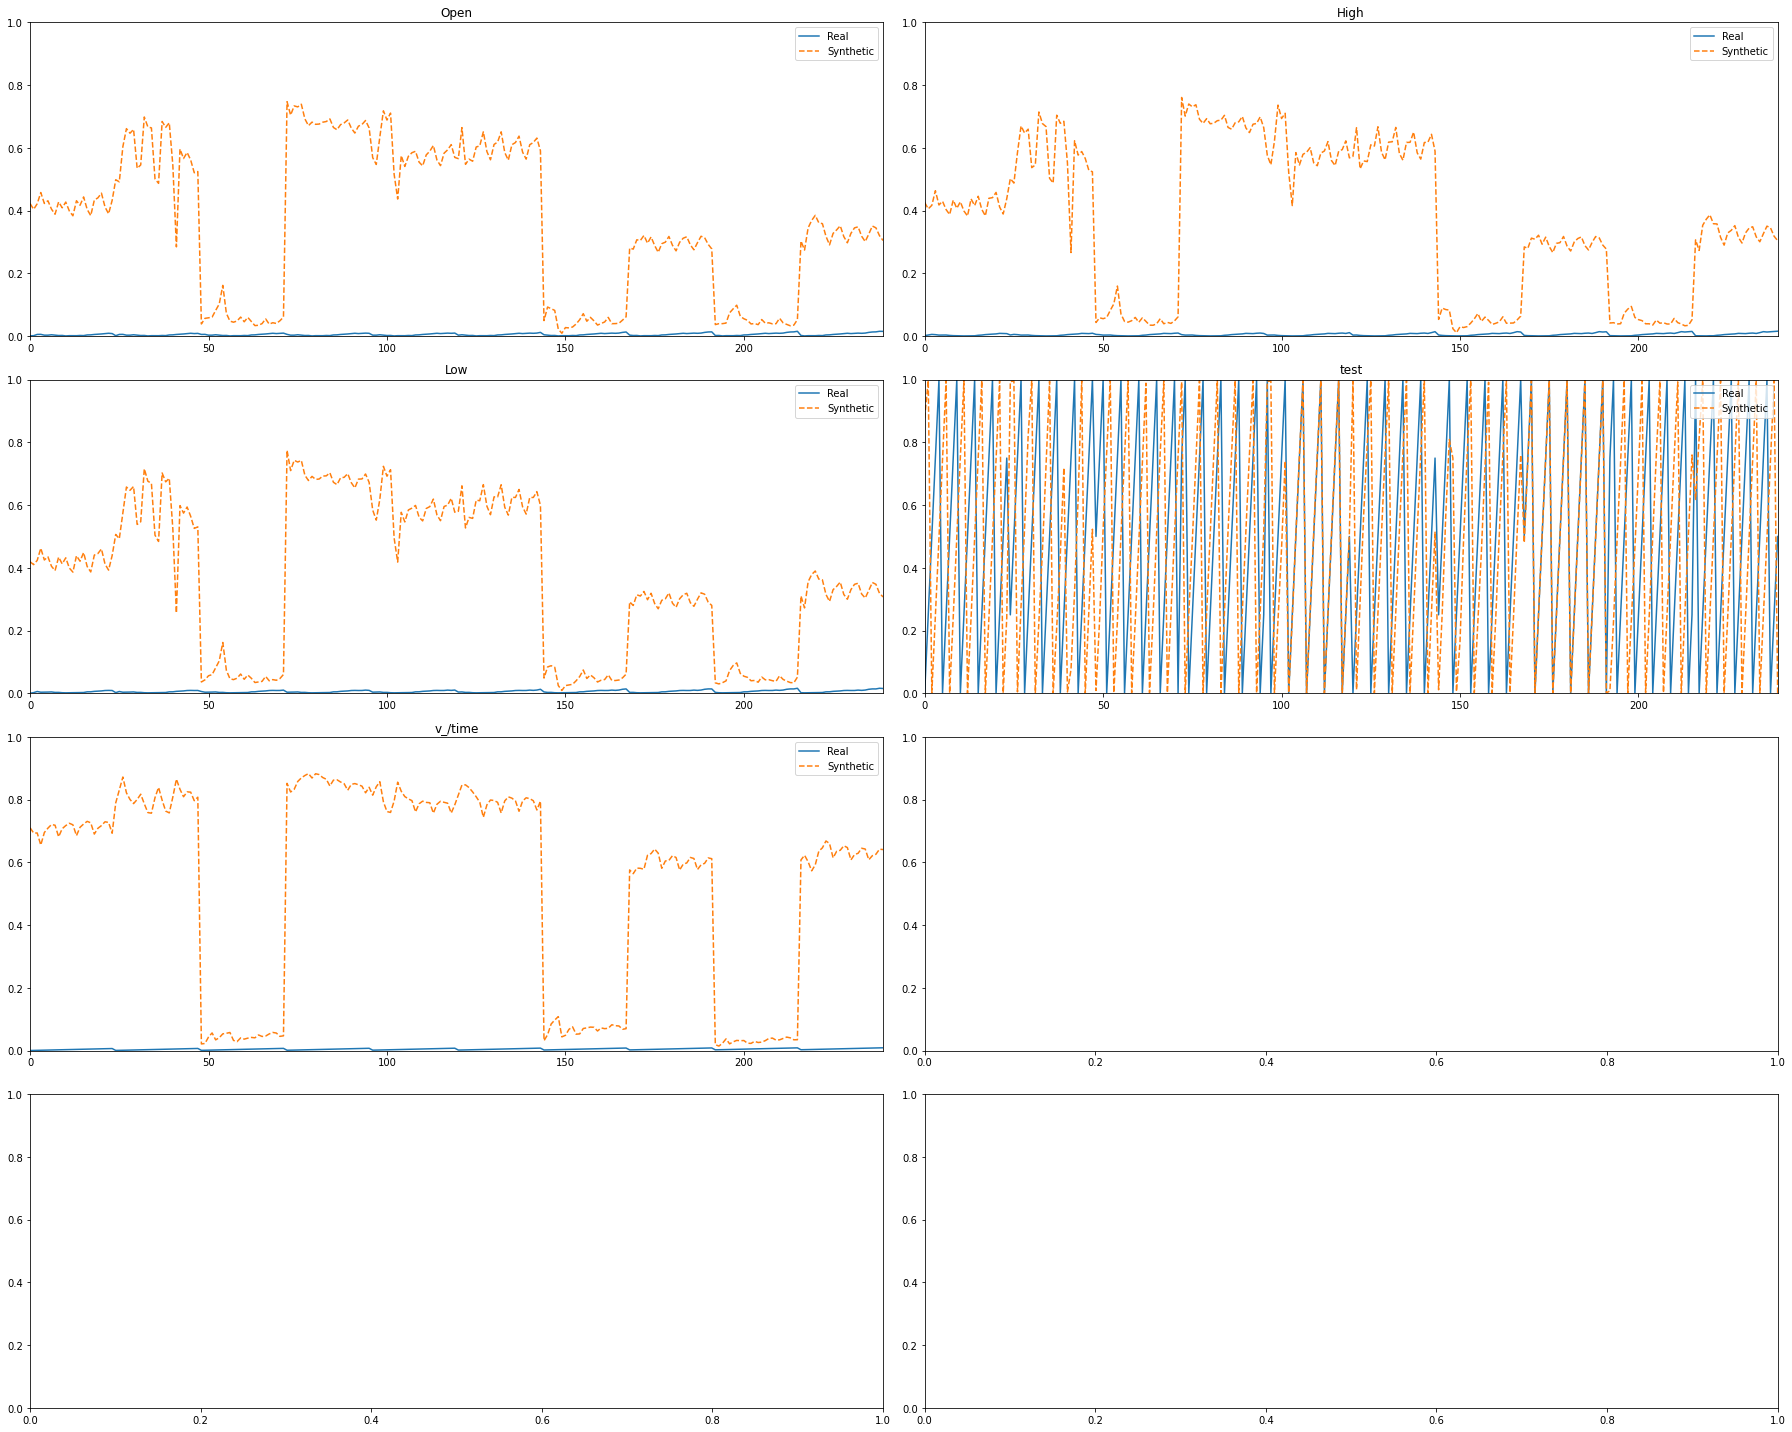

In [250]:
import matplotlib.pyplot as plt

cols_all = df_ori.columns.to_list()

# Plotting some generated samples. Both Synthetic and Original data are still standardized with values between [0, 1]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes=axes.flatten()

time = list(range(1,50))
obs = 0 #np.random.randint(len(ori_data))

for j, col in enumerate(cols_all):
    df = pd.DataFrame({'Real': np.hstack([item[:, j] for item in ori_data[obs:obs+10]]), # ori_data[obs][:, j],
                   'Synthetic': np.hstack([item[:, j] for item in generated_data[obs:obs+10]]) }) # generated_data[obs][:, j]})
    df.plot(ax=axes[j], ylim=(0,1),
            title=col,
            secondary_y='Synthetic data', style=['-', '--'])
fig.tight_layout()

In [251]:
diff_dataset = pd.DataFrame(columns=df_ori.columns)

for index, row in df_final.iterrows():
    if index % (seq_len * (seq_len - 1)) == 0:

        diff_df = df_final.loc[np.arange(index, index + seq_len)]
        diff_dataset = diff_dataset.append(diff_df, ignore_index=True, sort=False)


In [252]:
diff_dataset

,Open,High,Low,test,v_/time
0,564.927423,571.128600,551.340207,4.509869,1.593553e+09
1,542.525940,546.266146,540.384697,4.989948,1.593549e+09
2,564.239269,560.005801,556.667338,1.002072,1.593549e+09
3,608.006509,617.194157,603.172528,1.973656,1.593541e+09
4,565.288758,561.345473,558.187749,2.974156,1.593550e+09
5,575.873948,575.892650,570.486768,3.996977,1.593553e+09
6,543.306393,543.512097,534.032417,4.989610,1.593555e+09
7,523.445545,524.017338,517.417523,1.002006,1.593555e+09
8,571.578157,580.272243,569.248305,1.971608,1.593547e+09
9,548.481893,548.335210,543.210271,2.999844,1.593552e+09


<AxesSubplot:>

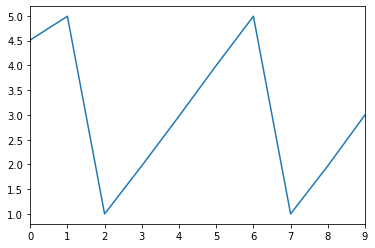

In [256]:
df_final['test'][:10].plot.line()

<AxesSubplot:>

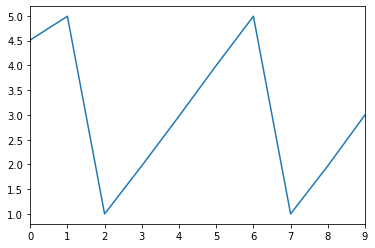

In [255]:
diff_dataset['test'][:10].plot.line()

<AxesSubplot:>

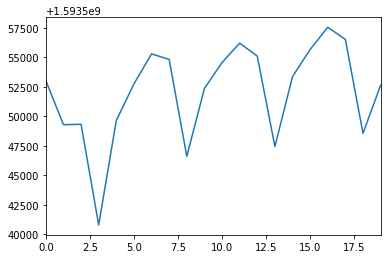

In [258]:
diff_dataset['v_/time'][:20].plot.line()

<AxesSubplot:>

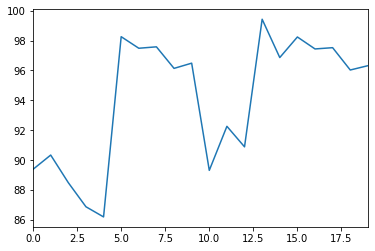

In [142]:
diff_dataset['col2'].plot.line()

<AxesSubplot:>

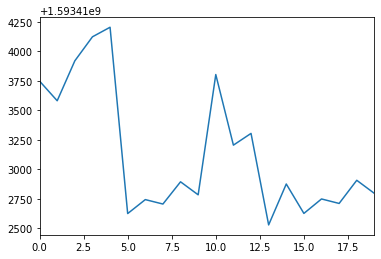

In [143]:
diff_dataset['col3'].plot.line()

<AxesSubplot:>

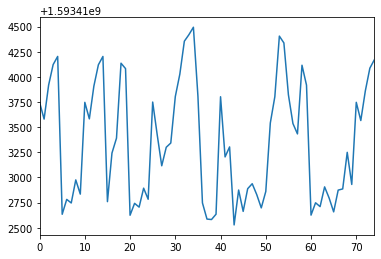

In [144]:
df_final['col3'].plot.line()